In [582]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

# Set up runtime configuration parameters for matplotlib appearance
matplotlib.rcParams["figure.figsize"] = (16,8)


In [584]:
# Read the data
df = pd.read_csv("hyderabad.csv")
df.head()

,Unnamed: 0,title,location,price(L),rate_persqft,area_insqft,building_status
0,0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction


In [586]:
df = df.rename(columns={'title': 'size'})
df = df.rename(columns={'area_insqft': 'total_sqft'})
df = df.rename(columns={'price(L)': 'price'})

In [588]:
df['bath'] = np.random.randint(1, 6, size=len(df))

In [590]:
df.head()

,Unnamed: 0,size,location,price,rate_persqft,total_sqft,building_status,bath
0,0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction,1
1,1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction,1
2,2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction,1
3,3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction,1
4,4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction,1


In [592]:
df1=df.drop(['rate_persqft','building_status'],axis='columns')
df1.head()

,Unnamed: 0,size,location,price,total_sqft,bath
0,0,3 BHK Apartment,Nizampet,108.00,1805,1
1,1,3 BHK Apartment,Bachupally,85.80,1560,1
2,2,2 BHK Apartment,Dundigal,55.64,1070,1
3,3,2 BHK Apartment,Pocharam,60.48,1210,1
4,4,3 BHK Apartment,Kollur,113.00,1900,1


In [594]:
# No.of null values in each column
df1.isnull().sum()

Unnamed: 0    0
size          0
location      0
price         0
total_sqft    0
bath          0
dtype: int64

In [596]:
# Drop the null rows
df2 = df1.dropna()
df2.isnull().sum()

Unnamed: 0    0
size          0
location      0
price         0
total_sqft    0
bath          0
dtype: int64

In [598]:
# Return the dimensions (rows, columns) of the DataFrame 'df2'
df2.shape

(3660, 6)

In [600]:
# Return unique values from the 'size' column
df2['size'].unique()

array(['3 BHK Apartment', '2 BHK Apartment', 'Residential Plot',
       '4 BHK Villa', '4 BHK Apartment', '5 BHK Villa',
       '3 BHK Independent House', '2 BHK Independent House',
       '3 BHK Independent Floor', '5 BHK Independent House',
       '10 BHK Independent House', '7 BHK Independent House',
       '3 BHK Villa', '4 BHK Independent House',
       '8 BHK Independent House', '6 BHK Independent House',
       '1 BHK Apartment', '2 BHK Independent Floor',
       '1 BHK Independent House', '5 BHK Apartment',
       '9 BHK Independent House', '1 RK Studio Apartment',
       '4 BHK Independent Floor', '6 BHK Villa', '2 BHK Villa'],
      dtype=object)

In [602]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]) if x.split(' ')[0].isdigit() else None)
df2 = df2.dropna(subset=['bhk'])


In [604]:
# Retrieve unique values in the 'bhk' column of the DataFrame 'df2'
df2['bhk'].unique()

array([ 3.,  2.,  4.,  5., 10.,  7.,  8.,  6.,  1.,  9.])

In [606]:
# Filter rows in df2 where the number of bedrooms (BHK) is greater than 10
df2[df2.bhk>5]

,Unnamed: 0,size,location,price,total_sqft,bath,bhk
111,111,10 BHK Independent House,Gachibowli,590.0,9000,4,10.0
117,117,10 BHK Independent House,Gachibowli,590.0,9000,5,10.0
131,131,7 BHK Independent House,Bairagiguda,265.0,5600,2,7.0
132,132,7 BHK Independent House,Bairagiguda,235.0,5400,3,7.0
193,193,8 BHK Independent House,Tarnaka,300.0,4500,1,8.0
196,196,8 BHK Independent House,Kavadiguda,406.0,4800,1,8.0
197,197,8 BHK Independent House,Himayat Nagar,400.0,4000,4,8.0
198,198,7 BHK Independent House,Banjara Hills,2500.0,12000,3,7.0
199,199,6 BHK Independent House,Habsiguda,480.0,6000,3,6.0
329,329,7 BHK Independent House,Suchitra,200.0,4000,3,7.0


In [608]:
# Retrieve unique values in the 'total_sqft' column of the DataFrame 'df2'
df2['total_sqft'].unique()

array([ 1805,  1560,  1070,  1210,  1900,  1480,  1675,  1705,  1811,
        1735,  1485,  4591,  1845,  1495,  1285,  3500,  3715,  1625,
        1643,  1711,  1942,  1107,  1722,  1915,  1325,   955,  1168,
        1116,  2425,  1250,  1983,  1350,  1980,  1910,  1682,  6500,
        2115,  1200,  1785,  1600,  3888,  4455,  5111,  1240,  1601,
        1400,  1570,  1581,  1321,  1150,  1180,  1100,  1170,  1430,
        1775,  1295,  1595,  1265,  1235,  1490,  1830,  2080,  2495,
        3030,  2590,  3150,  2176,  2377,  2635,  3951,  3283,  4566,
        1841,  1449,  1316,  1446,  1296,  1932,  1874,  1676,  1551,
        1927,  1926,  1732,  3225,  1185,  3200,   672,  2800,  2500,
        9000,  1004,  1500,  1260,   940,  2200,  5600,  5400,  1440,
        1475,  1033,  1215,  4983,  6069,  4955,  1060,  1750,   900,
        1780,  3600,  2000,  1935,  2410,  2360,  2710,  2390,  2060,
        1300,  5454,  1224,  1636,  1125,  2070,  4500,  2415,  4800,
        4000, 12000,

In [610]:
# Function to check if a given input can be converted to a float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [612]:
# Filter rows in df2 where 'total_sqft' is not a float value
df2[~df2['total_sqft'].apply(is_float)].head(5)

,Unnamed: 0,size,location,price,total_sqft,bath,bhk


In [614]:
def convert_sqft_range_to_num(x):
    try:
        # If 'x' is already a numeric value, return it as is
        if isinstance(x, (int, float)):
            return float(x)
        # If 'x' contains a range (e.g., "1200-1500"), take the average
        if '-' in str(x):
            nums = list(map(float, x.split('-')))
            return (nums[0] + nums[1]) / 2
        # Convert single string value to float
        return float(x)
    except:
        return None  # Return None for invalid entries


In [616]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_range_to_num)
df3 = df3.dropna(subset=['total_sqft'])  # Optionally drop rows with NaN values in 'total_sqft'
df3.head()


,Unnamed: 0,size,location,price,total_sqft,bath,bhk
0,0,3 BHK Apartment,Nizampet,108.00,1805.0,1,3.0
1,1,3 BHK Apartment,Bachupally,85.80,1560.0,1,3.0
2,2,2 BHK Apartment,Dundigal,55.64,1070.0,1,2.0
3,3,2 BHK Apartment,Pocharam,60.48,1210.0,1,2.0
4,4,3 BHK Apartment,Kollur,113.00,1900.0,1,3.0


In [618]:
# Access row at index 30 in DataFrame 'df3'
df3.loc[30]

Unnamed: 0                 30
size          3 BHK Apartment
location               Kollur
price                   145.0
total_sqft             2425.0
bath                        4
bhk                       3.0
Name: 30, dtype: object

In [620]:
# Create a copy of df3 as df4 and calculate price per square foot, then display the first few rows
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,Unnamed: 0,size,location,price,total_sqft,bath,bhk,price_per_sqft
0,0,3 BHK Apartment,Nizampet,108.00,1805.0,1,3.0,5983.379501
1,1,3 BHK Apartment,Bachupally,85.80,1560.0,1,3.0,5500.000000
2,2,2 BHK Apartment,Dundigal,55.64,1070.0,1,2.0,5200.000000
3,3,2 BHK Apartment,Pocharam,60.48,1210.0,1,2.0,4998.347107
4,4,3 BHK Apartment,Kollur,113.00,1900.0,1,3.0,5947.368421


In [622]:
# Rename columns for better understanding
# Rename columns 'price_per_sqft' to 'price_per_sqft_inr', 'price' to 'price_inr', and 'total_sqft' to 'total_sqft_inr'
df4.rename(columns={'price_per_sqft': 'price_per_sqft_inr', 
                    'price': 'price_inr'}, inplace=True)

In [624]:
# Display the first few rows of the DataFrame 'df4'
df4.head()

,Unnamed: 0,size,location,price_inr,total_sqft,bath,bhk,price_per_sqft_inr
0,0,3 BHK Apartment,Nizampet,108.00,1805.0,1,3.0,5983.379501
1,1,3 BHK Apartment,Bachupally,85.80,1560.0,1,3.0,5500.000000
2,2,2 BHK Apartment,Dundigal,55.64,1070.0,1,2.0,5200.000000
3,3,2 BHK Apartment,Pocharam,60.48,1210.0,1,2.0,4998.347107
4,4,3 BHK Apartment,Kollur,113.00,1900.0,1,3.0,5947.368421


In [626]:
# Get the number of unique locations in the 'location' column of DataFrame 'df4'
len(df4['location'].unique())

250

In [628]:
# Remove leading and trailing whitespace from the 'location' column and count occurrences, sorting in descending order
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Ameenpur                   160
Kondapur                    98
Kokapet                     93
Manikonda                   91
Miyapur                     60
                          ... 
Hyder nagar kphb colony      1
IDPL Colony                  1
Janawada                     1
Jawahar nagar                1
raidurgam                    1
Name: location, Length: 250, dtype: int64

In [630]:
# Count the number of locations with occurrences less than or equal to 10 in location_stats
len(location_stats[location_stats<=10])

207

In [632]:
# Filter and display locations with occurrences less than or equal to 10 from location_stats
location_stats_less_than_10 = location_stats[location_stats<=10]
print(location_stats_less_than_10)

location
Velmala                    10
Gandipet                   10
Himayat Nagar              10
Mallapur                   10
Khajiguda                  10
                           ..
Hyder nagar kphb colony     1
IDPL Colony                 1
Janawada                    1
Jawahar nagar               1
raidurgam                   1
Name: location, Length: 207, dtype: int64


In [634]:
# Get the number of unique locations in the 'location' column of DataFrame 'df4'
len(df4.location.unique())

250

In [636]:
# Replace locations with occurrences less than or equal to 10 with 'other' in the 'location' column of DataFrame 'df4'
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [638]:
# Get the number of unique locations in the 'location' column of DataFrame 'df4'
len(df4.location.unique())

44

In [640]:
# Display the first few rows of the DataFrame 'df4'
df4.head(10)

,Unnamed: 0,size,location,price_inr,total_sqft,bath,bhk,price_per_sqft_inr
0,0,3 BHK Apartment,Nizampet,108.00,1805.0,1,3.0,5983.379501
1,1,3 BHK Apartment,Bachupally,85.80,1560.0,1,3.0,5500.000000
2,2,2 BHK Apartment,other,55.64,1070.0,1,2.0,5200.000000
3,3,2 BHK Apartment,other,60.48,1210.0,1,2.0,4998.347107
4,4,3 BHK Apartment,Kollur,113.00,1900.0,1,3.0,5947.368421
5,5,3 BHK Apartment,Kukatpally,124.00,1480.0,4,3.0,8378.378378
7,7,3 BHK Apartment,Jeedimetla,101.00,1675.0,4,3.0,6029.850746
8,8,3 BHK Apartment,other,107.00,1705.0,3,3.0,6275.659824
9,9,3 BHK Apartment,Rajendra Nagar,108.00,1811.0,5,3.0,5963.556046
10,10,3 BHK Apartment,other,104.00,1735.0,4,3.0,5994.236311


In [642]:
# Filter rows where the ratio of total_sqft to number of bedrooms (bhk) is less than 300 and display the first few entries
df4[df4.total_sqft/df4.bhk<300].head()

,Unnamed: 0,size,location,price_inr,total_sqft,bath,bhk,price_per_sqft_inr
582,582,3 BHK Independent House,Peerzadiguda,92.5,740.0,5,3.0,12500.000000
1684,1684,4 BHK Independent House,other,65.0,1076.0,4,4.0,6040.892193
2804,2804,4 BHK Independent House,Beeramguda,110.0,1050.0,2,4.0,10476.190476


In [644]:
# Remove rows where the ratio of total_sqft to number of bedrooms is less than 300, and get the dimensions of the filtered DataFrame
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(2040, 8)

In [646]:
# Get summary statistics for the 'price_per_sqft_inr' column in the DataFrame 'df5'
df5.price_per_sqft_inr.describe()

count      2040.000000
mean       7235.346488
std        5072.793104
min         993.617021
25%        4998.260870
50%        6200.000000
75%        7935.868893
max      112474.437628
Name: price_per_sqft_inr, dtype: float64

In [648]:
# Remove outliers in price per square foot (pps) for each location and return a cleaned DataFrame 'df6'
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft_inr)
        st = np.std(subdf.price_per_sqft_inr)
        reduced_df = subdf[(subdf.price_per_sqft_inr>(m-st)) & (subdf.price_per_sqft_inr<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(1733, 8)

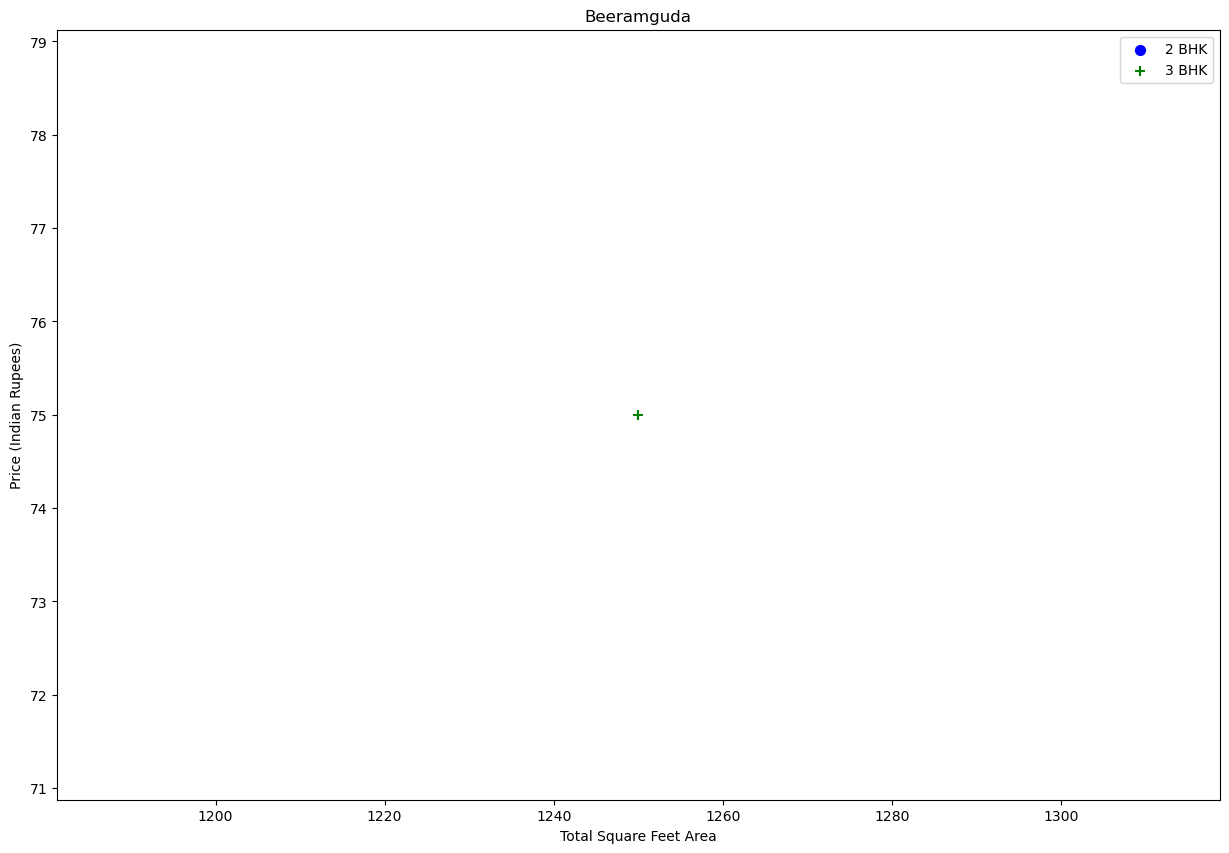

In [650]:
# Function to plot a scatter chart comparing prices of 2 BHK and 3 BHK properties in a specified location
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_inr,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_inr,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df6,"Beeramguda")  

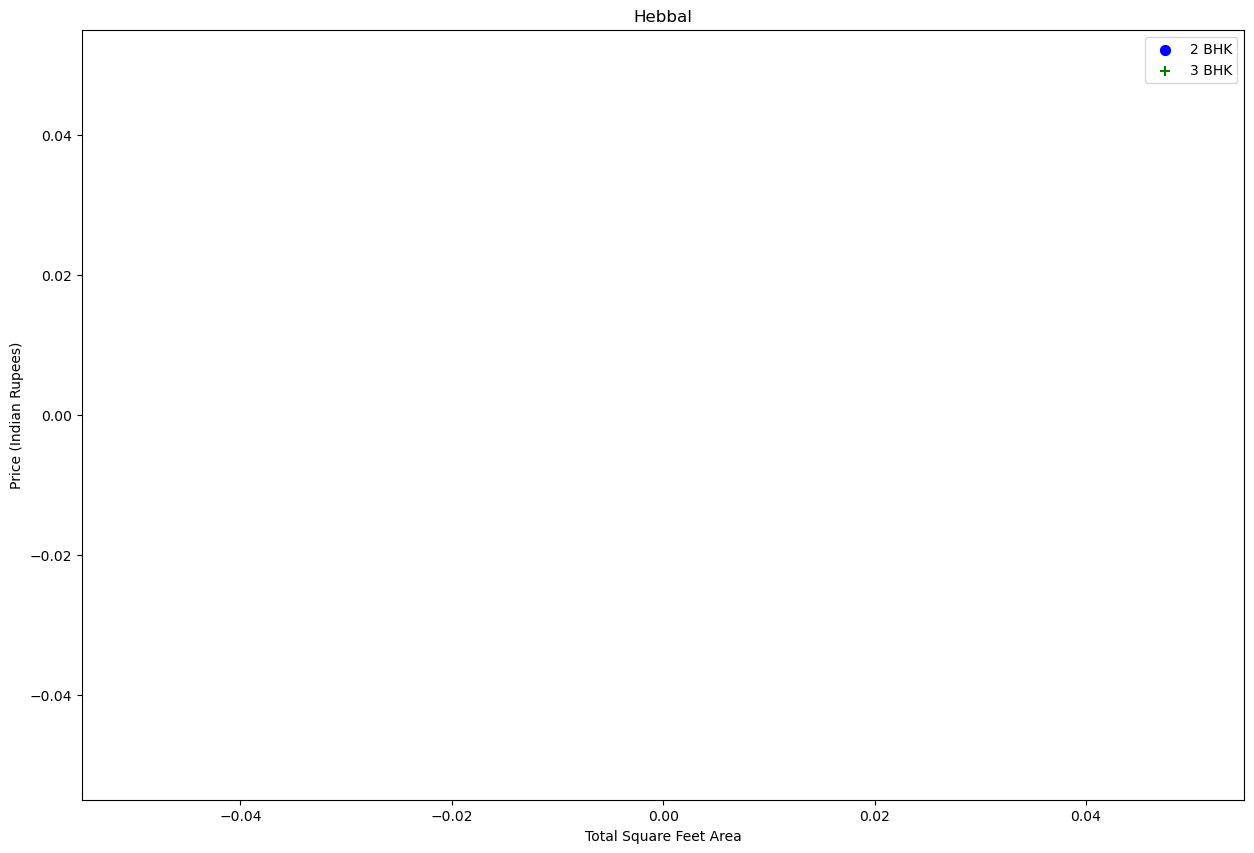

In [651]:
# Plot scatter chart for "Hebbal"
plot_scatter_chart(df6,"Hebbal")

In [653]:
# Remove BHK outliers based on price per square foot statistics for each location and return a cleaned DataFrame 'df7'
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft_inr),
                'std': np.std(bhk_df.price_per_sqft_inr),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft_inr<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(1282, 8)

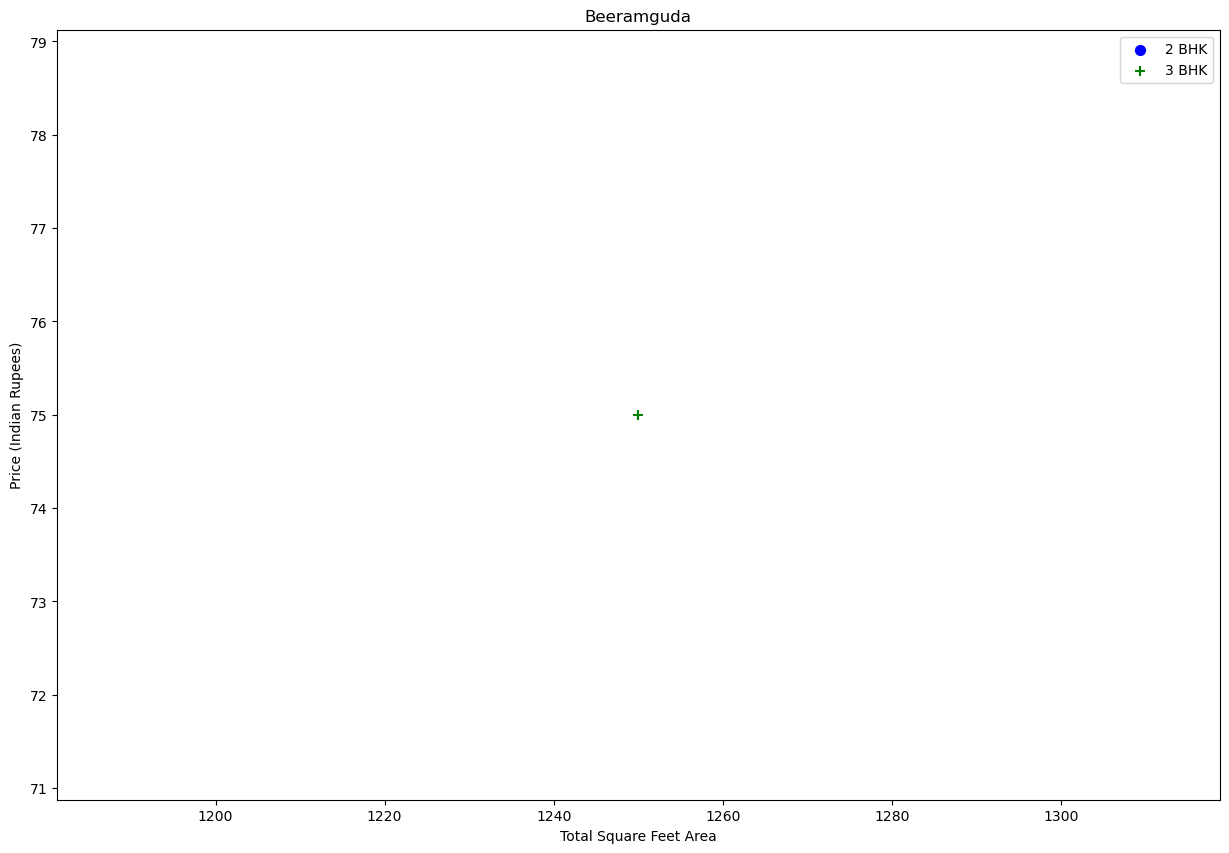

In [656]:
# Plot scatter chart for "Rajaji Nagar" and compare before outliers removal
plot_scatter_chart(df7,"Beeramguda")  

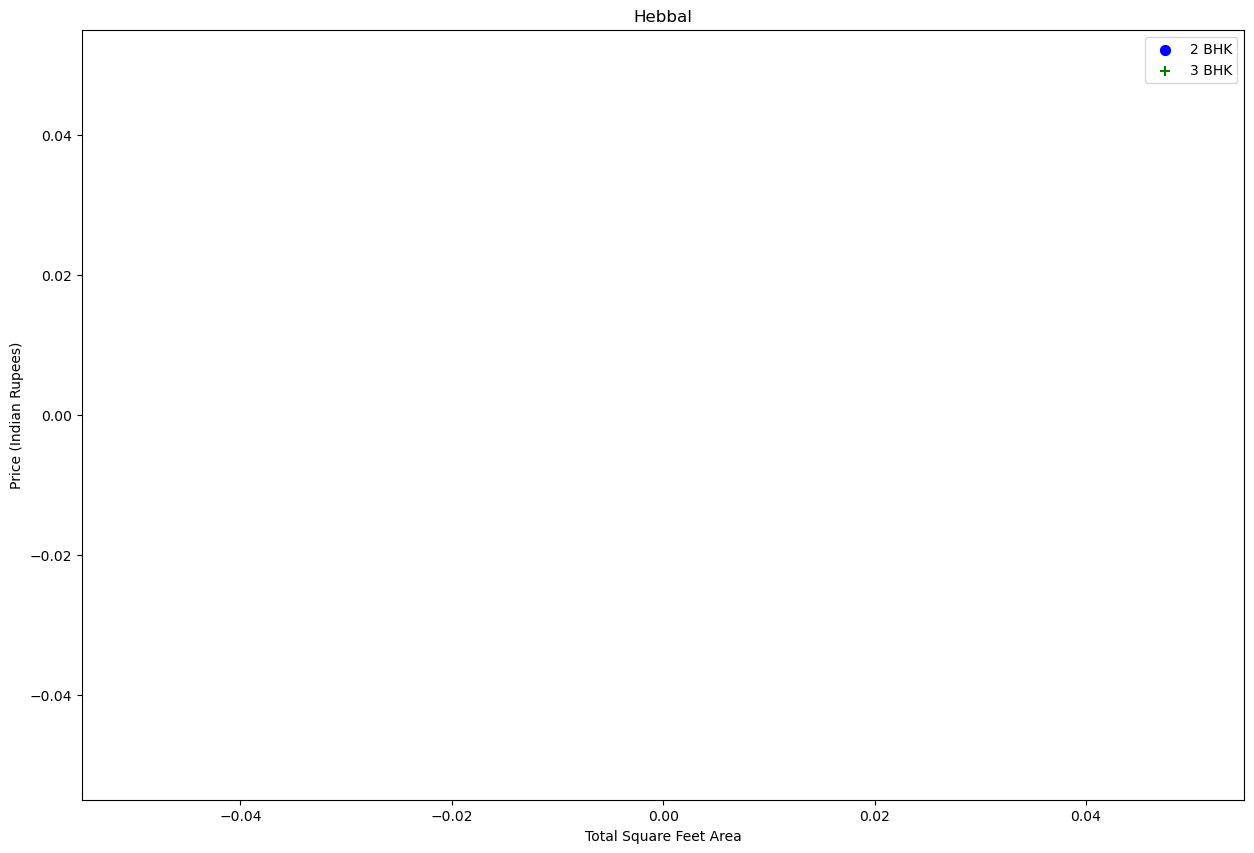

In [657]:
# Plot scatter chart for "Hebbal" and compare before outliers removal
plot_scatter_chart(df7,"Hebbal")  

Text(0, 0.5, 'Count')

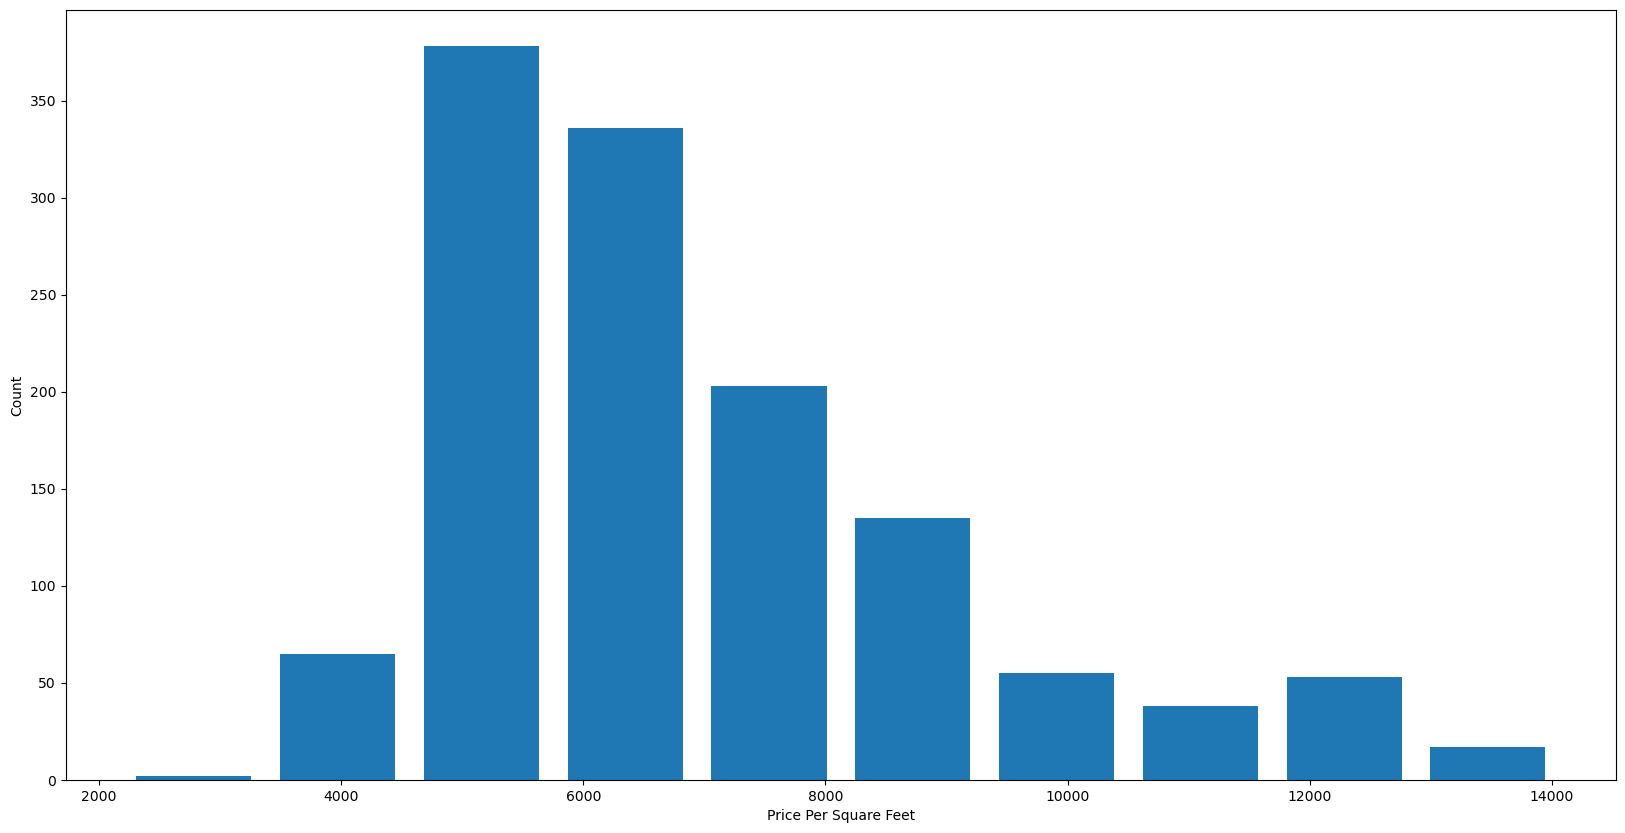

In [660]:
# Set the default figure size and create a histogram for the 'price_per_sqft_inr' column with specified width and axis labels
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft_inr,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [665]:
# Get the unique values in the 'bath' column of DataFrame 'df7'
df7.bath.unique()

array([2, 4, 1, 5, 3])

In [667]:
# Filter rows in df7 where the number of bathrooms (bath) is greater than 10
df7[df7.bath>10]

,Unnamed: 0,size,location,price_inr,total_sqft,bath,bhk,price_per_sqft_inr


Text(0, 0.5, 'Count')

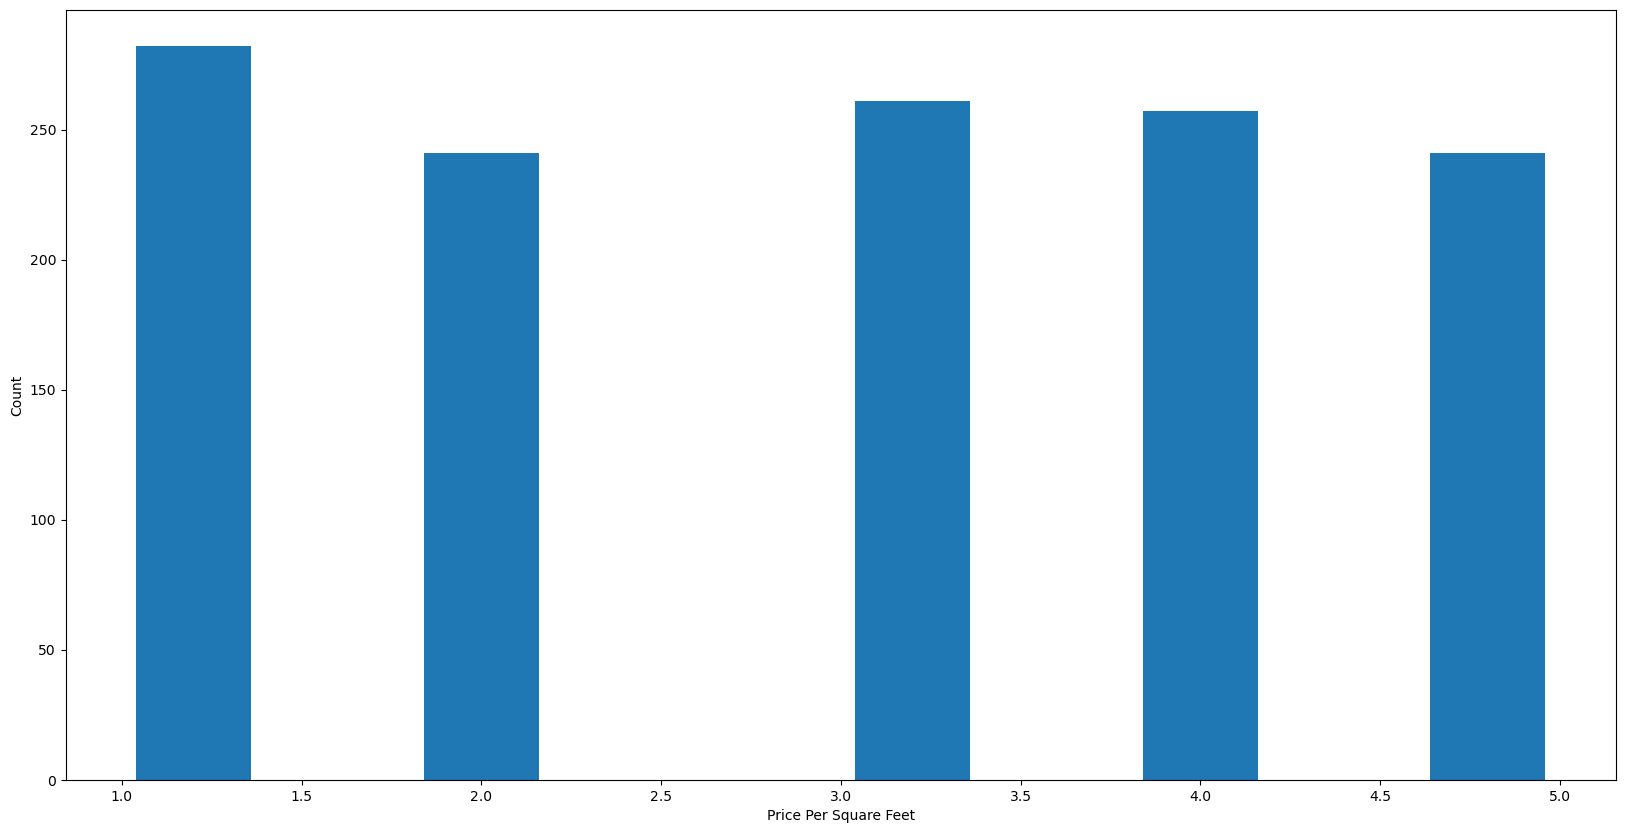

In [669]:
# Create a histogram of the 'bath' column with a specified bar width, and label the axes
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [671]:
# Filter rows in df7 where the number of bathrooms exceeds the number of bedrooms (BHK) plus 2
df7[df7.bath>df7.bhk+2]

,Unnamed: 0,size,location,price_inr,total_sqft,bath,bhk,price_per_sqft_inr
8,2142,2 BHK Apartment,Adibatla,50.77,1069.0,5,2.0,4749.298410
10,2144,2 BHK Apartment,Adibatla,56.95,1199.0,5,2.0,4749.791493
15,466,2 BHK Independent Floor,Ameenpur,160.00,2300.0,5,2.0,6956.521739
26,1641,2 BHK Apartment,Ameenpur,53.00,1070.0,5,2.0,4953.271028
31,1646,2 BHK Apartment,Ameenpur,66.98,1150.0,5,2.0,5824.347826
...,...,...,...,...,...,...,...,...
1681,3547,2 BHK Independent Floor,other,65.00,1000.0,5,2.0,6500.000000
1699,3571,1 BHK Apartment,other,27.00,753.0,5,1.0,3585.657371
1701,3573,1 BHK Apartment,other,25.60,753.0,5,1.0,3399.734396
1720,3621,2 BHK Apartment,other,125.00,1200.0,5,2.0,10416.666667


In [673]:
# Filter DataFrame 'df7' to include rows where the number of bathrooms is less than the number of bedrooms (BHK) plus 2
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(937, 8)

In [675]:
# Create a new DataFrame df9 by dropping columns 'size' and 'price_per_sqft' from 'df8'
df9 = df8.drop(['size','price_per_sqft_inr'], axis='columns')
df9.head()

,Unnamed: 0,location,price_inr,total_sqft,bath,bhk
0,126,Adibatla,78.00,1500.0,2,3.0
2,701,Adibatla,108.00,1972.0,2,3.0
3,702,Adibatla,126.00,2300.0,2,3.0
4,703,Adibatla,152.00,2767.0,1,3.0
6,2140,Adibatla,56.81,1196.0,1,2.0


In [677]:
# Create dummy variables for the 'location' column in DataFrame 'df9'
dummies = pd.get_dummies(df9.location)
dummies = dummies.astype(int)
dummies.head(10)

,Adibatla,Ameenpur,Aminpur,Appa Junction Peerancheru,Attapur,Bachupally,Bandlaguda Jagir,Beeramguda,Bolarum,Bowrampet,...,Patancheru,Peerzadiguda,Pragathi Nagar Kukatpally,Puppalaguda,Rajendra Nagar,Sainikpuri,Serilingampally,Tellapur,Tukkuguda,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [679]:
df10 = pd.concat([df9, dummies.drop('other', axis = 'columns')], axis = 'columns')
df10.head()

,Unnamed: 0,location,price_inr,total_sqft,bath,bhk,Adibatla,Ameenpur,Aminpur,Appa Junction Peerancheru,...,Nizampet,Patancheru,Peerzadiguda,Pragathi Nagar Kukatpally,Puppalaguda,Rajendra Nagar,Sainikpuri,Serilingampally,Tellapur,Tukkuguda
0,126,Adibatla,78.00,1500.0,2,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,701,Adibatla,108.00,1972.0,2,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,702,Adibatla,126.00,2300.0,2,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,703,Adibatla,152.00,2767.0,1,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2140,Adibatla,56.81,1196.0,1,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [681]:
# Drop the 'location' column from DataFrame 'df10' and store the result in 'df11'
df11 = df10.drop('location', axis = 'columns')
df11.head()

,Unnamed: 0,price_inr,total_sqft,bath,bhk,Adibatla,Ameenpur,Aminpur,Appa Junction Peerancheru,Attapur,...,Nizampet,Patancheru,Peerzadiguda,Pragathi Nagar Kukatpally,Puppalaguda,Rajendra Nagar,Sainikpuri,Serilingampally,Tellapur,Tukkuguda
0,126,78.00,1500.0,2,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,701,108.00,1972.0,2,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,702,126.00,2300.0,2,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,703,152.00,2767.0,1,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2140,56.81,1196.0,1,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [683]:
# Return the dimensions (rows, columns) of the DataFrame 'df11'
df11.shape

(937, 48)

In [685]:
# Create feature set X by dropping the 'price' column from DataFrame 'df11'
X = df11.drop('price_inr', axis = 'columns')
X.head()

,Unnamed: 0,total_sqft,bath,bhk,Adibatla,Ameenpur,Aminpur,Appa Junction Peerancheru,Attapur,Bachupally,...,Nizampet,Patancheru,Peerzadiguda,Pragathi Nagar Kukatpally,Puppalaguda,Rajendra Nagar,Sainikpuri,Serilingampally,Tellapur,Tukkuguda
0,126,1500.0,2,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,701,1972.0,2,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,702,2300.0,2,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,703,2767.0,1,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2140,1196.0,1,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [687]:
# Extract the target variable 'price' from DataFrame 'df11' and display the first few values
y = df11.price_inr
y.head()

0     78.00
2    108.00
3    126.00
4    152.00
6     56.81
Name: price_inr, dtype: float64

In [689]:
# Split the dataset into training and testing sets with 80% training data and 20% testing data, using a random state of 10 for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [691]:
# Train a Linear Regression model on the training data and evaluate its performance on the test data
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.9392253349468298

In [693]:
# Perform cross-validation using ShuffleSplit with 5 splits, 20% test size, and evaluate using Linear Regression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.90899964, 0.91715575, 0.85665876, 0.93875239, 0.81161122])

In [695]:
# Perform GridSearchCV to find the best model and hyperparameters for linear regression, lasso, and decision tree algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.886636,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.874177,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.812836,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [697]:
# Predict the price using the trained linear regression model (lr_clf) based on location, square feet area, number of bathrooms, and number of bedrooms (BHK)
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [699]:
import warnings
warnings.filterwarnings("ignore")

In [705]:
# Predict the price for a property
predict_price('Beeramguda', 1000, 2, 2)

-38.1207234733137

In [707]:
# Predict the price for a property
predict_price('Beeramguda', 1000, 3, 3)

-38.93484654327487

In [709]:
# Export the tested model to a pickle file
import pickle
with open('hyderabad_house_data_model.pickle', 'wb') as file:
    pickle.dump(lr_clf, file)

In [711]:
# Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as file:
    file.write(json.dumps(columns))